# 지도학습 회귀 맛보기

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 농어 무게 예측

##### 1. 데이터 로드 및 정제 ~ 2. 데이터 확인 (EDA)

In [102]:
# - input data: 길이
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )

# - target(label) data: 무게
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

perch_length.shape, perch_weight.shape

((56,), (56,))

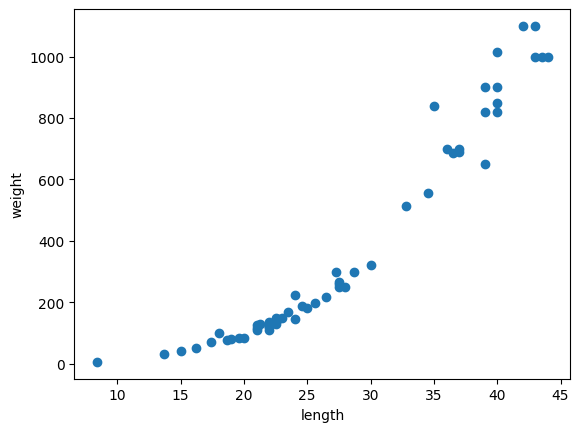

In [59]:
# 데이터 시각화
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 3. 데이터 전처리 ~ 4. 데이터 분리

In [60]:
# 훈련/평가 데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = \
    train_test_split(perch_length, perch_weight, random_state=42)

train_input.shape, test_input.shape

((42,), (14,))

In [61]:
# 배치차원 추가 (why? 모델의 input data가 2차원이어야 함)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

train_input.shape, test_input.shape
# reshape(-1, 1) 이유는 하나의 열(특징)과 여러 행(샘플 수)을 사용하기에

((42, 1), (14, 1))

##### 5. 모델 선정 및 학습 

In [104]:
# 모델 학습
from sklearn.neighbors import KNeighborsRegressor

kn = KNeighborsRegressor()
kn.fit(train_input, train_label)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


##### 6. 모델 평가

- score(): 모델 task에 따른 대표 평가 지표로 평가
    - 분류(classification): 정확도(Accuracy score)
    - 회귀(regression): 결정계수(R2 score)

In [63]:
# 모델 평가
kn.score(test_input, test_label)

0.992809406101064

##### 7. 예측

In [ ]:
kn.predict([[30]])

array([311.4])

In [65]:
distance, index = kn.kneighbors([[30]])
print(distance, index)

# KNN 회귀 모델의 예측 결과 == k개 이웃 데이터포인트의 평균값 
print(train_label[index].mean())

[[1.3 2.5 2.5 2.8 3.5]] [[28 13 18 20 21]]
311.4


##### [참고] KNN(최근접이웃)모델의 한계

- 메모리에 로드된 데이터포인트만 대상으로 예측(추론)하므로 한계점에서 취약
- 용량이 큰 데이터를 메모리에 로드하는 데 시간이 오래 걸림

In [66]:
kn.predict([[50], [100], [1000]])

array([1010., 1010., 1010.])

### 선형회귀 모델

- 속성에 따라 회귀 계수와 절편을 학습하고 이를 통해 예측 (추론)



**컬럼이 하나인 경우**
$y = wx + b$

1. 회귀계수 (= 기울기, 가중치, weight, coefficient)
2. 절편 (= 편향, bias, intercept)

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_label)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [68]:
w = lr.coef_
b = lr.intercept_
pred_x = np.array([50,100])

# y = wx + b 
w * pred_x + b

array([1241.83860323, 3192.69585141])

In [69]:
lr.predict([[50], [100]])

array([1241.83860323, 3192.69585141])

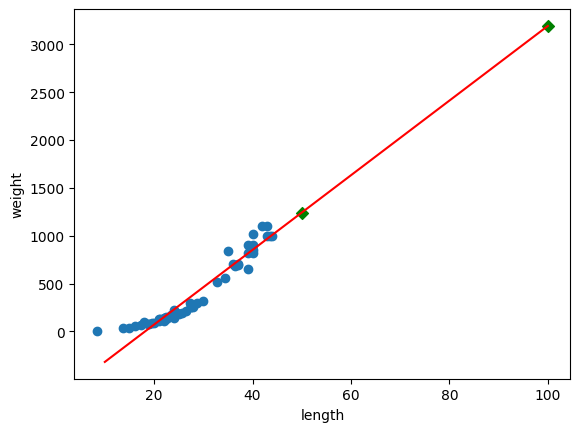

In [70]:
plt.scatter(perch_length, perch_weight)
plt.plot([10,100], [w*10+b,w*100+b], color='red')
plt.scatter(50,w*50+b, color='green', marker='D')
plt.scatter(100,w*100+b, color='green', marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 컬럼이 여러 개인 경우

$y = w_1x_1 + w_1x_2 + w_1x_3 + ... + b$

- 회귀계수 여러 개 (컬럼 수 만큼)
- 절편 한 개

In [71]:
perch_df = pd.read_csv('./data/perch_full.csv')
perch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [72]:
# 입력 데이터 (X data)
perch_full = perch_df.to_numpy()

# 라벨 데이터 (y data)
perch_weight.shape

(56,)

In [73]:
# 훈련-테스트 데이터 분리

from sklearn.model_selection import train_test_split

train_input, test_input, train_label, test_label = \
    train_test_split(perch_full, perch_weight, random_state=42)

train_input.shape, test_input.shape


((42, 3), (14, 3))

In [74]:
# 학습

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_label)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [75]:
# (1) 가중치, 절편을 받아서 직접 계산 / x =  [20.0, 5.08, 2.77]

x1, x2 ,x3 = 20.0,5.08,2.77
w1,w2,w3 = lr.coef_
b = lr.intercept_

print(w1*x1 + w2*x2 + w3*x3 + b)

40.484698833552216


In [76]:
# (2) 예측 / x = [20.0, 5.08, 2.77]

lr.predict([[20.0,5.08,2.77]])

array([40.48469883])

In [77]:
lr.score(test_input,test_label), lr.score(train_input,train_label)

(0.8796419177546367, 0.9559326821885706)

##### [참고] 과대적합 & 과소적합

**과대적합(overfitting)**
- 훈련 데이터에 대한 평가는 좋지만, 테스트 데이터에 대한 평가는 현저히 떨어지는 상태
- 모덿이 훈련 데이터에 지나치게 최적화되어 새로운 데이터에 일반화되지 않은 상태
- 훈련 데이터의 잡음까지 학습된 상태
- 해결방법
    - 데이터셋의 복잡도 줄이기
    - 학습할 데이터의 양을 늘리기
    - L1, L2가 적용된 규제 모델 사용

**과소적합(underfitting)**
- 모델 훈련(학습)이 덜 된 상태
- 속성을 제대로 분석하지 못한 상태
- 훈련 데이터에 대한 평가조차 좋지 않은 상태
- 해결 방법
    - 학습할 데이터를 추가 제공 (행을 늘리는 것)
    - 특성을 추가해 복잡한 패턴을 학습 (열을 늘리는 것)

### 특성 공학 (Feature Engineering)

- 기계학습 성능 향상을 위해 기존 데이터에서 새로운 특성을 만들거나 기존 특성을 변환하는 전처리
    - 특성 생성 (파생 변수, polynominalFeatures, ...)
    - 특성 변환
        - 범주형 데이터 처리 (Encoding)
        - 데이터 정규화 (Scaling)
    - 결측치 처리
    - 차원 축소 (= 컬럼 수 줄임)

In [96]:
from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(include_bias=False)             # 기본값 include_bias = True
poly = PolynomialFeatures(include_bias=False, degree=3)     # 기본값 degree = 2
poly.fit([[3,5]])
poly.transform([[3,5]])

array([[  3.,   5.,   9.,  15.,  25.,  27.,  45.,  75., 125.]])

In [79]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [87]:
poly = PolynomialFeatures(include_bias=False,degree=2)
poly.fit(perch_full)
perch_poly = poly.transform(perch_full)
perch_poly.shape

(56, 9)

In [84]:
train_input, test_input, train_label, test_label = \
    train_test_split(perch_poly,perch_weight,random_state=42)

In [85]:
lr = LinearRegression()
lr.fit(train_input,train_label)
lr.score(train_input, train_label), lr.score(test_input,test_label)

(0.9963872340980141, 0.9410534492198891)

In [99]:
def test_poly_features(degree):
    
    # PolynomialFeatures를 이용해 degree만큼 특성 생성
    poly = PolynomialFeatures(include_bias=False,degree=degree)
    poly.fit(perch_full)
    perch_poly = poly.transform(perch_full)
    perch_poly.shape

    # 훈련-테스트 데이터 분리
    train_input, test_input, train_label, test_label = \
    train_test_split(perch_poly,perch_weight,random_state=42)
    
    # 학습
    lr = LinearRegression()
    lr.fit(train_input,train_label)
    
    # 훈련 데이터 평가 점수/테스트 데이터 평가 점수 반환
    lr.score(train_input, train_label), lr.score(test_input,test_label)

    return lr.score(train_input, train_label), lr.score(test_input,test_label)

In [100]:
# degree를 늘려가며 성능 확인 (2~10)

for degree in range(2,11):
    train_score, test_score = test_poly_features(degree)
    print(f"{degree}차수 : 훈련 데이터 {train_score} | 테스트 데이터 평가 {test_score}")
    
# 컬럼이 많다고(= 특성이 많다고, X 데이터가 많다고) 과소적합을 무조건 해결할 수 있는 것은 아니다.

2차수 : 훈련 데이터 0.9903183436982126 | 테스트 데이터 평가 0.9714559911594125
3차수 : 훈련 데이터 0.9963872340980141 | 테스트 데이터 평가 0.9410534492198891
4차수 : 훈련 데이터 0.9995286898073679 | 테스트 데이터 평가 -6.786696932218207
5차수 : 훈련 데이터 0.9999999999997232 | 테스트 데이터 평가 -144.40564483377855
6차수 : 훈련 데이터 0.9999999999999948 | 테스트 데이터 평가 -242.38576916675416
7차수 : 훈련 데이터 0.9999999999999997 | 테스트 데이터 평가 -638.5116143136543
8차수 : 훈련 데이터 0.9999999999999998 | 테스트 데이터 평가 -1952.8625816244762
9차수 : 훈련 데이터 0.9999999999999983 | 테스트 데이터 평가 -6179.7323171834705
10차수 : 훈련 데이터 0.9999948123428241 | 테스트 데이터 평가 -9826.555405663586
